In [2]:
import pandas, numpy

import matplotlib.pyplot as plt
import pathlib 
import seaborn

from skops.io import load

pathlib.Path('pdf/supplemental').mkdir(exist_ok=True)

In [3]:
best_model = {}

for model in ['LR', 'NN', 'XB']:
    best_model[model] = load('models/'+model.lower()+'.skops', trusted=True)

X={}
Y={}
Z={}

for i in ['mic']:
    X[i]={}
    Y[i]={}
    Z[i]={}
    with open('data/ds-'+i+'.npy', 'rb') as f:
        Y[i]['input'] = numpy.load(f)
        X[i]['input'] = numpy.load(f)
        Z[i]['input'] = numpy.load(f, allow_pickle=True)

In [4]:
mics = pandas.read_csv('data/ds-mic-phen.csv')
mics.MIC.value_counts().sort_index()

MIC
0           1
0-25        2
100         2
200         2
200-300     1
300-400     1
600         1
600-800     2
75-100      2
800        18
>100       25
Name: count, dtype: int64

In [5]:
def assign_numerical_mic(row):
    if row.MIC=='>100':
        return(800)
    elif row.MIC=='75-100':
        return(87.5)
    elif row.MIC=='0-25':
        return(12.5)
    elif row.MIC=='600-800':
        return(700)
    elif row.MIC=='300-400':
        return(350)
    elif row.MIC=='200-300':
        return(250)
    else:
        return(int(row.MIC))
    
mics['numerical_mic'] = mics.apply(assign_numerical_mic, axis=1)



for model in ['LR', 'NN', 'XB']:

    def find_score(row):
        mask = Z['mic']['input']==row.MUTATION
        return(Yscores[mask][0])

    Ypred = best_model[model].predict(X['mic']['input'])
    Yscores = best_model[model].predict_proba(X['mic']['input'])[:,1]

    mics[model+'_score'] = mics.apply(find_score, axis=1)
    
mics[:3]

,MUTATION,CONSISTENT_PHENOTYPE,MIC,SOURCE,numerical_mic,LR_score,NN_score,XB_score
0,V7G,R,800,CDC,800.0,0.963952,1.0,0.988174
1,D8N,R,800,CDC,800.0,0.748252,1.0,0.948584
2,Q10R,R,800,CDC,800.0,0.890579,1.0,0.928592


In [11]:
mics.numerical_mic>100

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37    False
38     True
39     True
40    False
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48    False
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
Name: numerical_mic, dtype: bool

/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


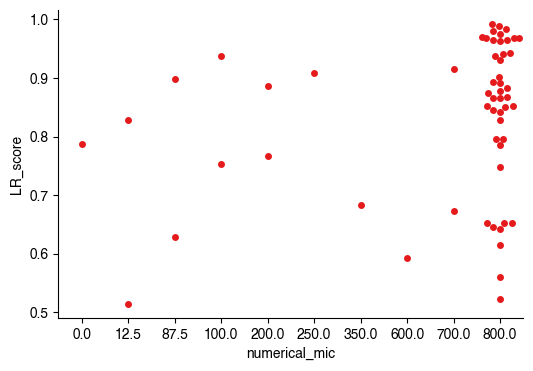

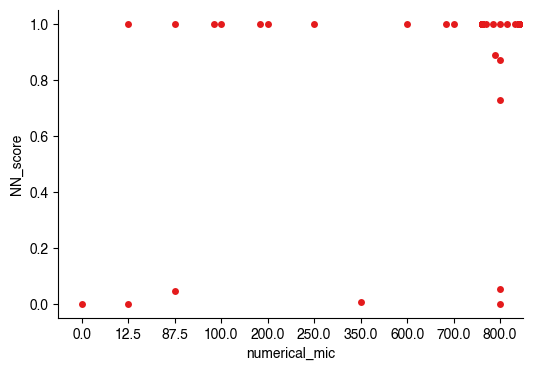

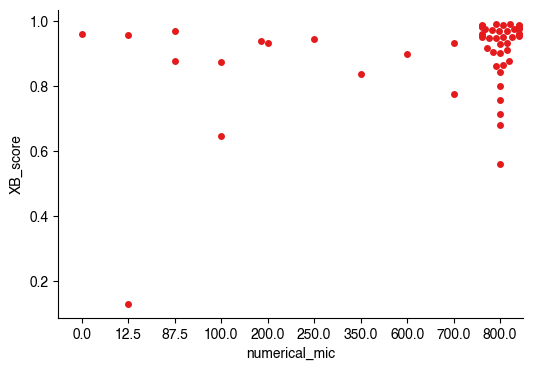

In [16]:
for model in ['LR', 'NN', 'XB']:

    fig = plt.figure(figsize=(6, 4))
    # axes.plot([100,100], [0,1], 'k--')
    axes = seaborn.swarmplot(data=mics,y=model+'_score',x='numerical_mic', size=5, color='#e41a1c')
    # axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    # axes.set_yticks([0,0.5,1])
    # axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-swarm-'+model+'.pdf',bbox_inches='tight',transparent=True)

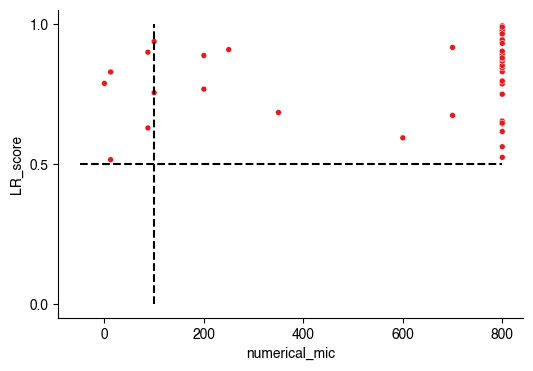

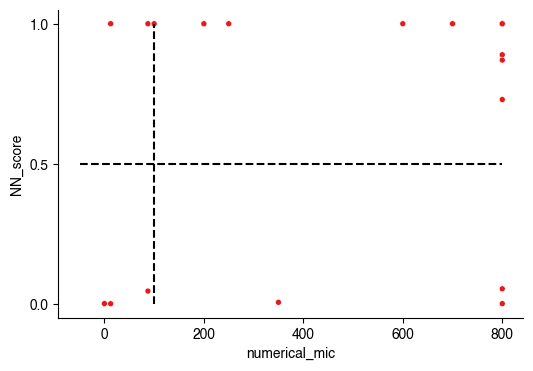

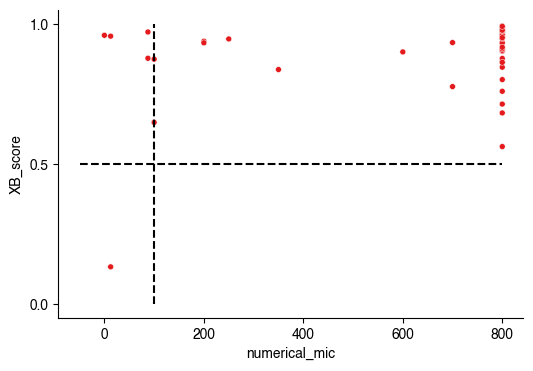

In [17]:
for model in ['LR', 'NN', 'XB']:
    fig = plt.figure(figsize=(6, 4))
    axes = seaborn.scatterplot(data=mics,y=model+'_score',x='numerical_mic', size=8, color='#e41a1c', legend=None)
    axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.set_yticks([0,0.5,1])
    axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-scatter-'+model+'.pdf',bbox_inches='tight',transparent=True)